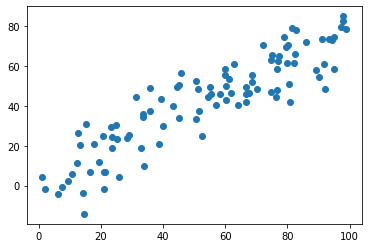

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100, size=100)
X[:,1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

plt.scatter(X[:,0], X[:,1])
plt.show()

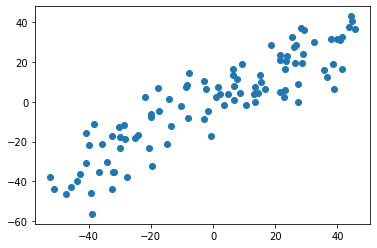

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

X_demean = demean(X)
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [26]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# 把向量单位化
def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X)) - abs(f(last_w, X)) < epsilon):
           break
        cur_iter += 1
    return w


In [27]:
initial_w = np.random.random(X.shape[1])
eta = 0.001
w = first_component(X_demean, initial_w, eta)
w
# plt.scatter(X_demean[:, 0], X_demean[:, 1])
# plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
# plt.show()

array([0.77135006, 0.63641109])

In [28]:
# X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w) * w

X2 = X - X.dot(w).reshape(-1, 1) * w

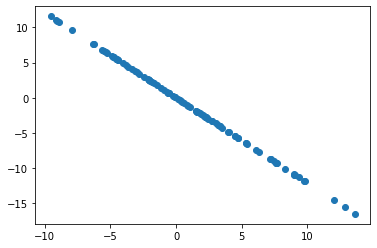

In [29]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [30]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.63639346,  0.77136461])

In [31]:
w.dot(w2)  # w和w2应该是垂直的

2.2857453091384983e-05

In [32]:
def first_n_component(n, X, eta = 0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X.shape[1])
        eta = 0.001
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res

In [36]:
first_n_component(2, X)  # 第二个方向是反的？

[array([0.77134991, 0.63641128]), array([-0.63639434,  0.77136389])]